# Final Project: Suicides: A Hidden message in Data

## Introduction
One of the main driving forces for our group to choose the WHO – Suicide Statistics data set was because the ongoing pandemic that our generation has witnessed and is currently going through. It is no secret that during the early days of the lock-down and constant social distancing that mental health has become a very large challenge for the population. There have been many new personalities on various global social platforms such as twitter, Instagram, or Facebook, preaching about the importance of a work-life balance and good mental health. While previously the thought of mental health may have been a social stereotype, and many would believe it to be nothing, but a misnomer, facts and studies published have probed that mental health, mental health disorders such as depression, anxiety, or obsessive-compulsive disorder can pull people towards taking their own lives. This data set really resonated with us as students who are always under pressure to perform well and achieve greatness, we thought choosing this data would help make us aware and help us to spread knowledge amongst our close circles to destigmatize this topic that might provide a network of support for individuals considering suicide. We hoped that we could use a simple university project to convey a message no matter how minor its approach may be.

## Data Description:
The dataset selected was the World Health Organization Suicide Statistic. According to the WHO the availability and quality of the data they collect on suicide and suicide attempts cannot always be fully accurate. Only ~80 members countries of WHO are able to provide good-quality data that can be used to estimate suicide rates but given the sensitivity of suicide and the idea of the illegality of suicidal behaviour there is often under reporting and misclassification of the act. Because of misclassification and under reporting, it can lead to even more problems in the data set compared to other causes of death. The reference to the data:
[1]D. Rocha, "WHO Suicide Statistics", Kaggle.com, 2017. [Online]. Available: https://www.kaggle.com/szamil/who-suicide-statistics. [Accessed: 02- Dec- 2021].
Overall assessing the data, we have to keep in mind it may not be accurate for all countries as the WHO has to estimate some values because of under reporting and misclassification because of the stigma and taboo around the act. 


## Analysis of the Data:
Overall, the data represents number of suicides for every country per year from 1979 to 2017. So, the overall feature of the data set include Country, Year, Sex, Age, Number of Suicides, Population of Country. In the data 141 countries we present to be referenced. As WHO cannot estimate data entirely and some countries are not recognized officially from the WHO the overall data set contain only 141. The range of data starts at the earliest from 1979 to the latest being of 2017.  Though it is apparent that not all 141 countries have data represented for every year. There are only two genders recorded in the data set by WHO. The data is organized into 6 ranges of ages to be reported. Those being: 5-14 → 15-24 → 25-34 → 35 – 54 → 55-74 → 75+. The last two features of the data rea number of suicides and number of all living people per country. 
There are a number of ways that can be chosen to organize the data. We can organise it per year or country, and that can be chosen, if necessary, when using the data to find conclusions and create hypothesis. Some early cleaning completed on the data set includes the removal of the word 'years' from the age column, formatting ages to be easily read by code, for example changing 5-14 years range to 05-14. As some data is present for some countries and some is not, and it is varying from year to year we also clean the data to remove any Nans in the columns. 


In [1]:
import csv
import re
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd
from scipy import stats
#import pycountry
#import geopandas

In [2]:
def get_data_csv():
    collection = []
    with open('who_suicide_statistics.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
data = get_data_csv()
df = pd.DataFrame(data)

# cleaning the data by removing 'years' from the age column 
df.loc[:, 'age'] = df['age'].str.replace(' years','')

#formatting '5-14' to '05-14' to access it more easily 
df.loc[df['age'] == '5-14', 'age'] = '05-14'

# dropping NaNs from working columns 
df['suicides_no'] = pd.to_numeric(df['suicides_no'], errors='coerce')
df['population'] = pd.to_numeric(df['population'], errors='coerce')


## Exploratory Data Analysis

In [3]:
# 1. To get a basic idea about each country and its trend, what is the crude rate of suicides per 100K people in each country in the span from 1979 
#to 2016?
df['crude_rate_per_100k'] = df['suicides_no'] / (df['population'] / 100000)

# dropping old indices
df.dropna(inplace=True)
df.reset_index(drop = True, inplace = True)
df

,country,year,sex,age,suicides_no,population,crude_rate_per_100k
0,Albania,1987,female,15-24,14.0,289700.0,4.832585
1,Albania,1987,female,25-34,4.0,257200.0,1.555210
2,Albania,1987,female,35-54,6.0,278800.0,2.152080
3,Albania,1987,female,05-14,0.0,311000.0,0.000000
4,Albania,1987,female,55-74,0.0,144600.0,0.000000
...,...,...,...,...,...,...,...
36055,Virgin Islands (USA),2015,male,25-34,2.0,4609.0,43.393361
36056,Virgin Islands (USA),2015,male,35-54,1.0,12516.0,7.989773
36057,Virgin Islands (USA),2015,male,05-14,0.0,7291.0,0.000000
36058,Virgin Islands (USA),2015,male,55-74,0.0,12615.0,0.000000


### Why are we using crude rates?
The usage of rates is self-evident, because the sheer number of suicides is proportional to the population size: the larger the country, the more suicides. What's less evident is that these rates, also known as crude rates, make it impossible to compare nations properly. Suicide rates fluctuate greatly based on demographic groupings, as we will see, therefore while looking at a country as a whole, one must consider its existing demographic composition. This is why the World Health Organization (WHO) employs age-standardized rates as well.

sex     year
female  1979     29418.0
        1980     42629.0
        1981     47448.0
        1982     47564.0
        1983     34759.0
                  ...   
male    2012    179154.0
        2013    175375.0
        2014    174384.0
        2015    159200.0
        2016     12615.0
Name: suicides_no, Length: 76, dtype: float64


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


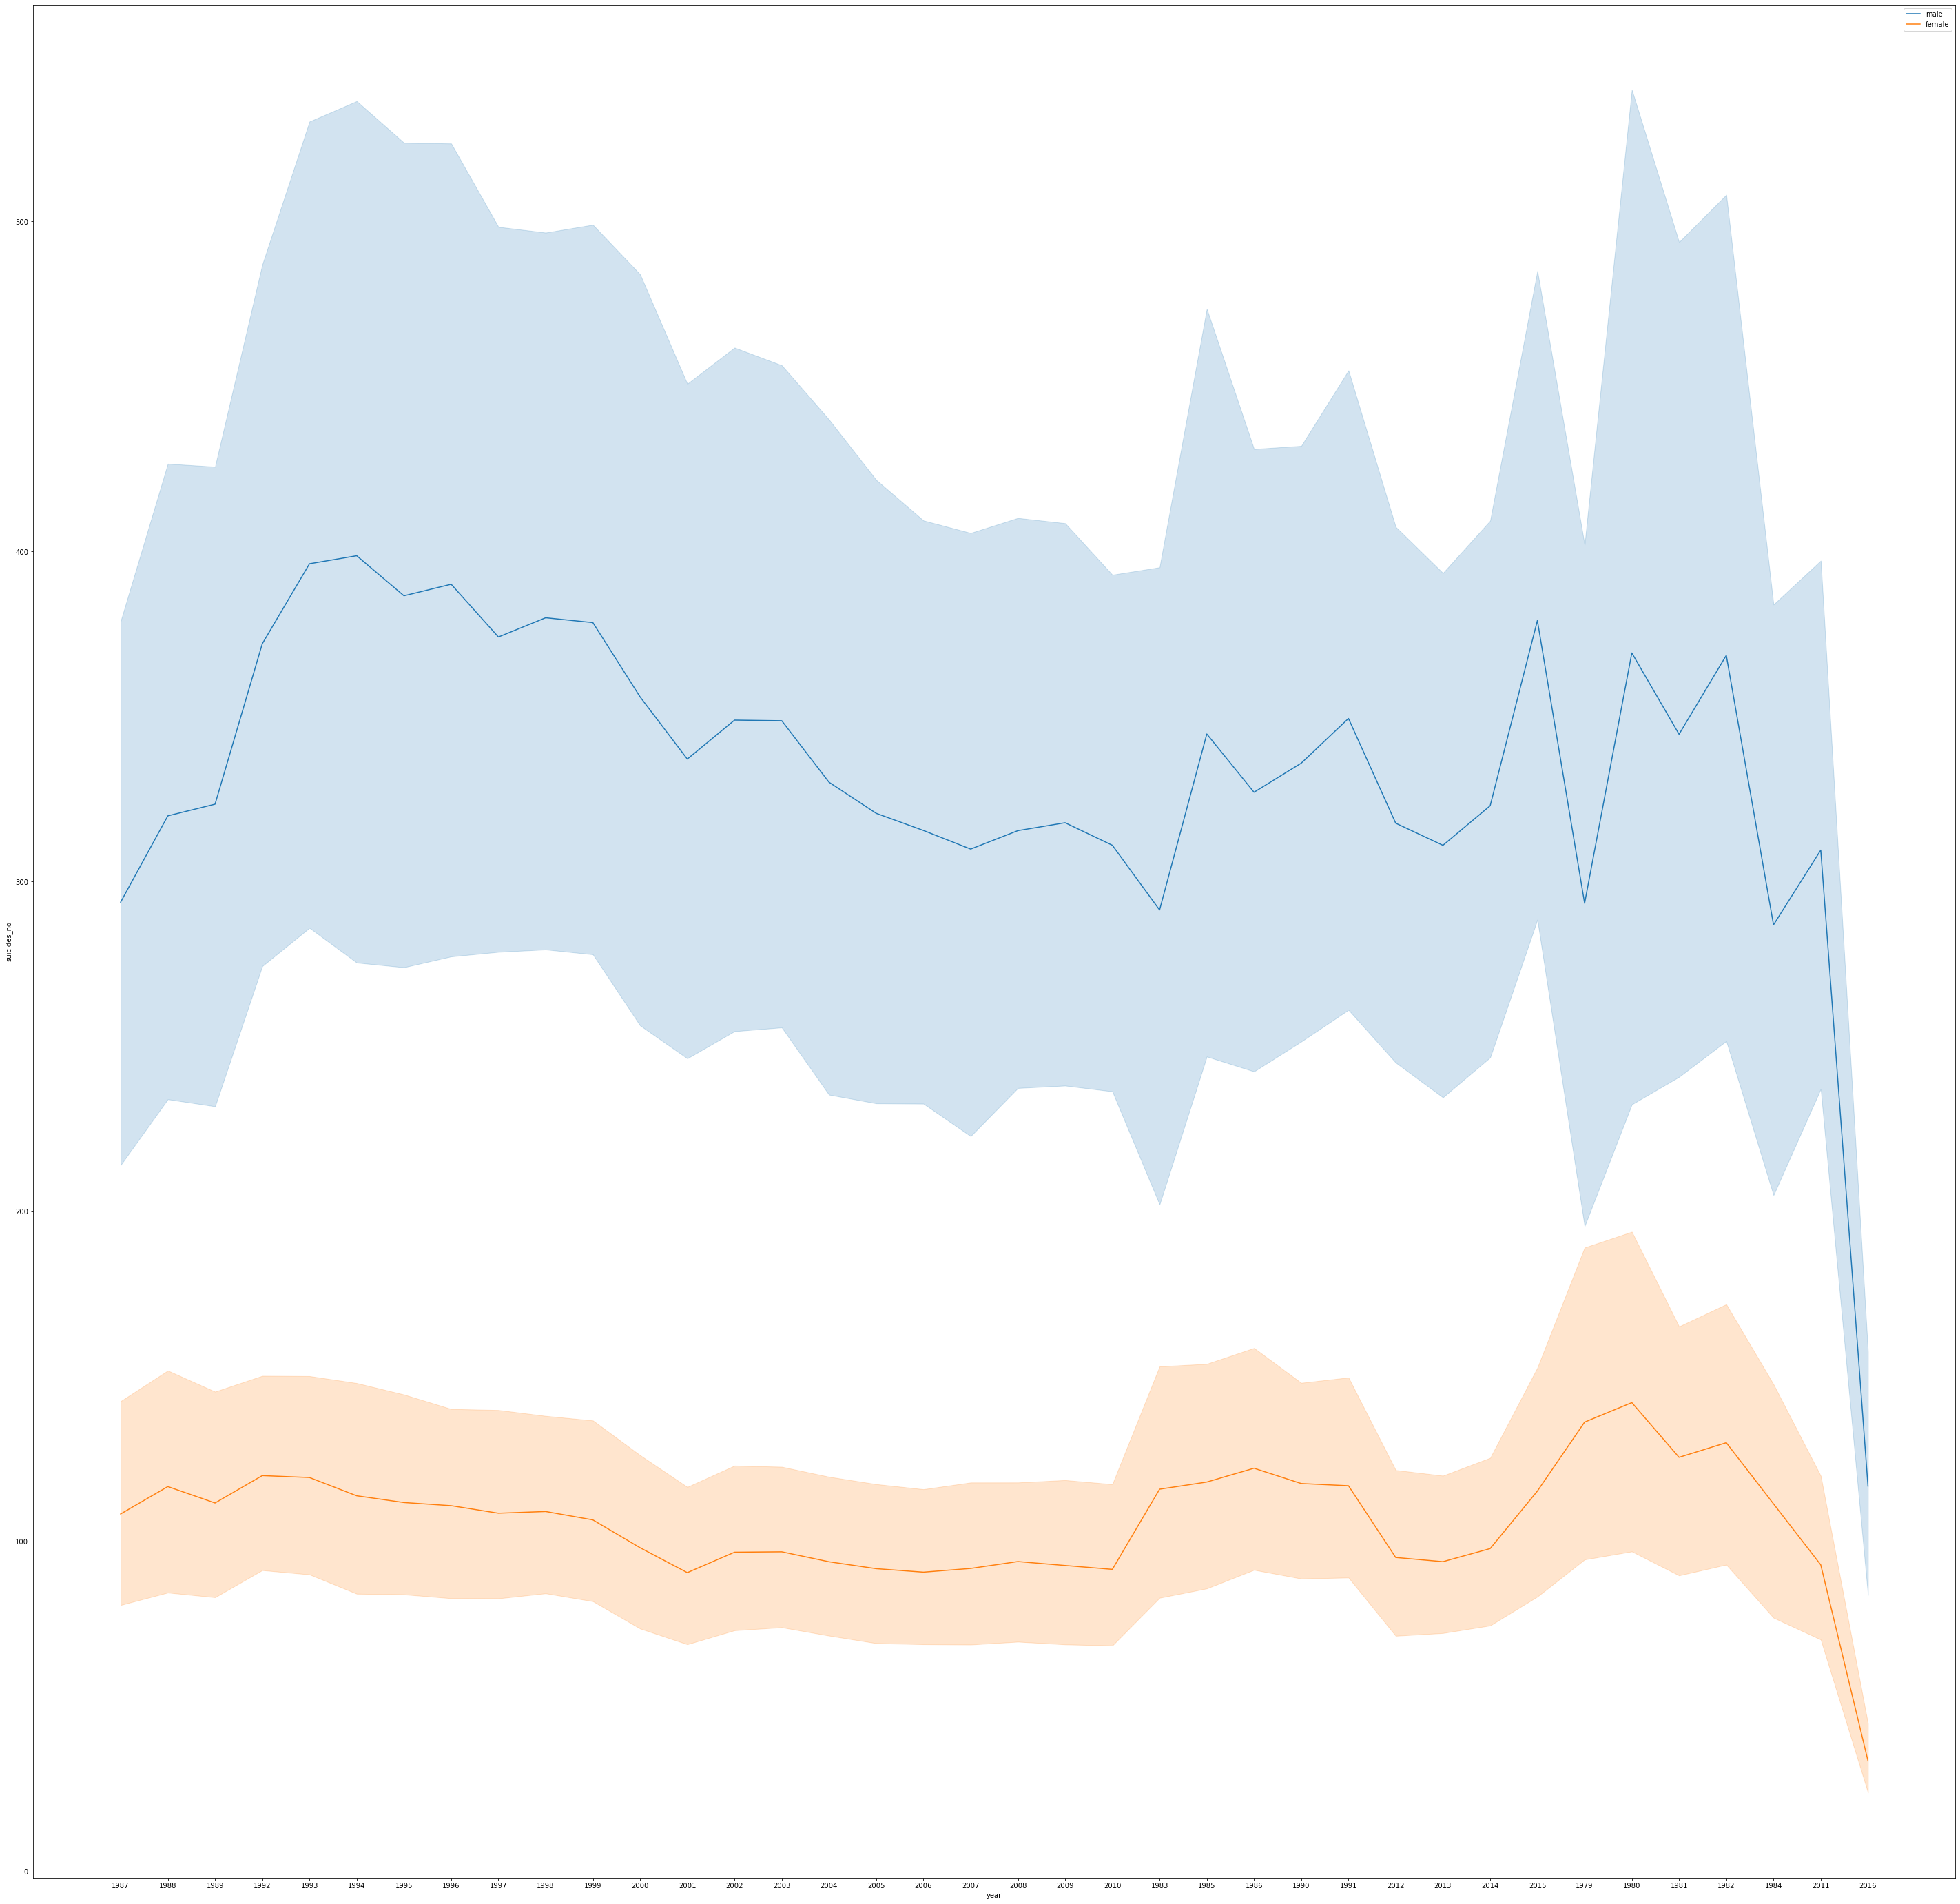

In [4]:
#2. Caluclate the total number of suicides in male and in female seperately in each year? Compare the results. 



suicides_sexwise_yearwise = df.groupby(["sex", "year"])["suicides_no"].sum()

print(suicides_sexwise_yearwise)


df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]

plt.figure(figsize=(50,50))
sns.lineplot(df_men.year, df.suicides_no)
sns.lineplot(df_women.year, df.suicides_no)

plt.legend(["male", 'female'])
plt.show()



## An eye opener: 
Irrespective of the year or century, the number of suicides committed by men is approximately 3 times than the number of suicides committed by women. 

In [5]:
# 3. Calculare the total number of suicides based on the attribute of the age group.

df.groupby("age")["suicides_no"].sum()

age
05-14      62320.0
15-24     975700.0
25-34    1360780.0
35-54    2887740.0
55-74    1955150.0
75+       756777.0
Name: suicides_no, dtype: float64

/tmp/ipykernel_99/2253687566.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_generation = df.groupby(["year", "age"])["suicides_no", "population"].sum()


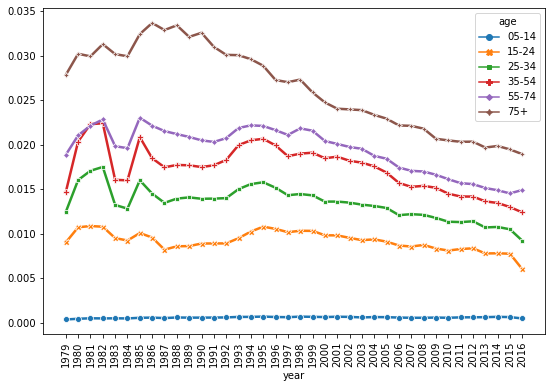

In [7]:
df_generation = df.groupby(["year", "age"])["suicides_no", "population"].sum()
df_generation_reset = df_generation.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot(x = "year", y = df_generation_reset.suicides_no*100/df_generation_reset.population, hue = "age", 
            data = df_generation_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

## What do we see?
We can see a directly proportionate relation between age and number of suicides but the fact that "suicides" in general is a social topic which is believed that have numerous affecting factors. As there are unknown variables involved that can affect the number of suicides it would be logically correct for us to believe that age and number of suicides merely have a correlation. It directs out the idea that age is not the cause or rather age is not the only cause behind suicides. So, the question is what are the causes or reasons behind suicides? We shall come back to this question. 

In [8]:
#4. By comparing the total number of suicides committed per year, try to decribe the trend globally. 

suicides_countrywise_yearwise = df.groupby(["country", "year"])["suicides_no"].sum()

print(suicides_countrywise_yearwise)


country               year
Albania               1987    73.0
                      1988    63.0
                      1989    68.0
                      1992    47.0
                      1993    73.0
                              ... 
Virgin Islands (USA)  2009     9.0
                      2010     8.0
                      2011     8.0
                      2012    10.0
                      2015     3.0
Name: suicides_no, Length: 3005, dtype: float64


## Lets dissect: 
What we just did was cold calculation and the output was just in terms of numbers. Now, why would this be unfair when we would see it through a data scientist's eye? 
Reasons:
1. The number of suicides we see does not belong to the same data pool. To be precise, we are seeing the number of suicides of different countries that have different populations too. The number game would bring out a confusing image and might lead to false inferences. 
2. Seeing a bulk data like that in boxes and lines would not allow naked human eye to bring about concrete arguments. There is no use of data which does not convey the information. 

What did we do? 

We used the primary principle that the census department has been using from days immemorial in every corner of the world; RATIO. We calculated the suicide rate on annual basis and then we used its average as a common rate of comparison. Also, as it would be clumsy to illustrate all countries and their rates on a single screen we presented the first 20 countries from the list. 


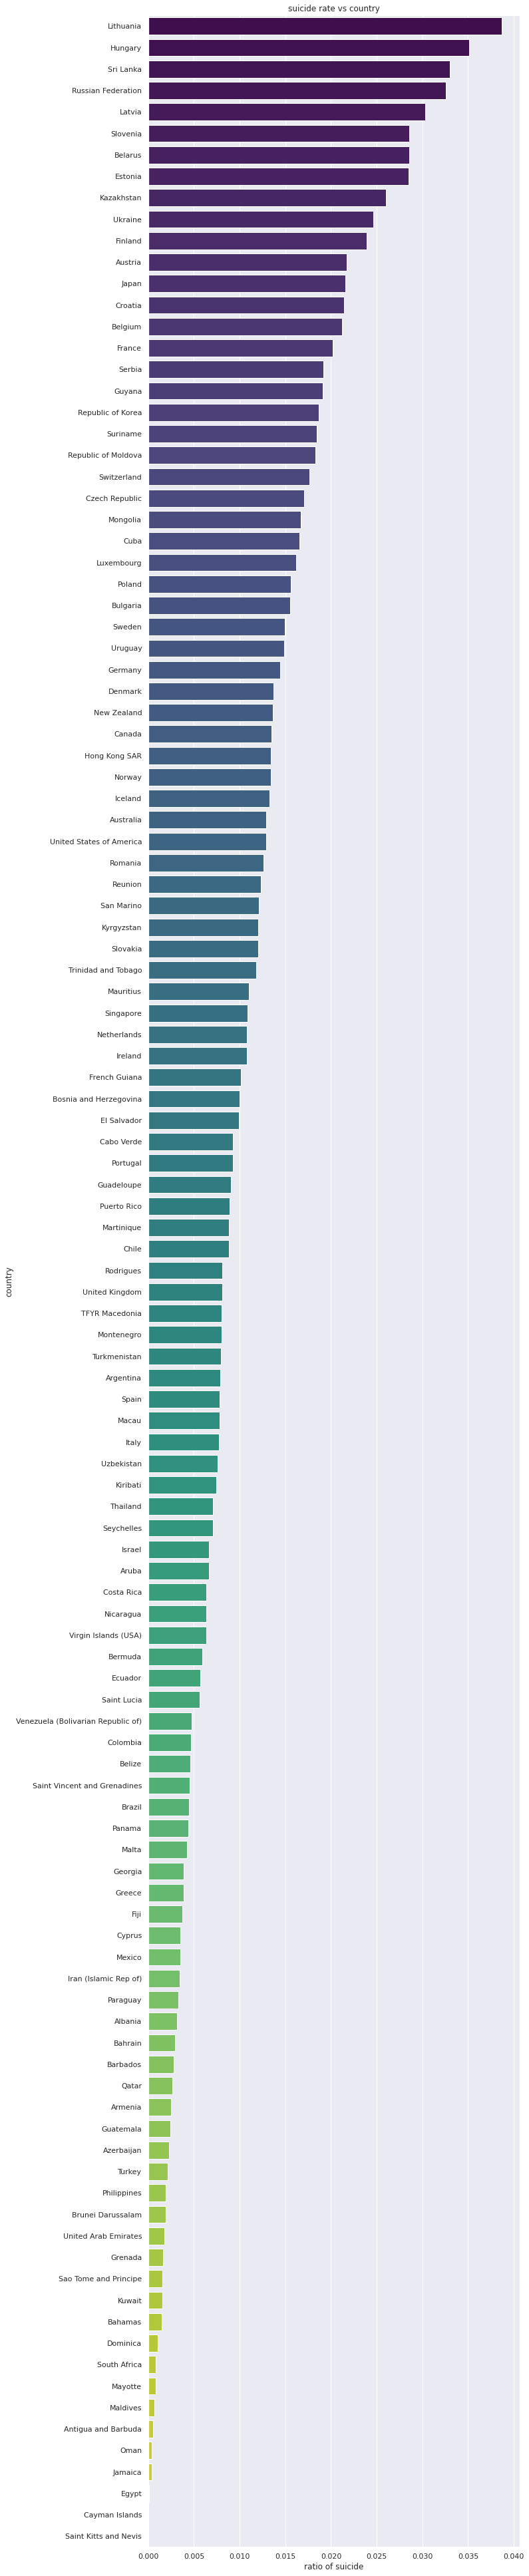

In [10]:
#Calculated previously 
#suicides_countrywise_yearwise 
df_suc_tot = suicides_countrywise_yearwise.sort_index(ascending=True)[:] * 100

# processing the countries population in the same we did with suicides_countrywise_yearwise
df_pop = df.groupby(["country","year"]).population.sum()
df_pop_tot = df_pop.sort_index(ascending=False)[:]

df_total = df_suc_tot/ df_pop_tot

# we create a list of countries that are present in our data set or csv file
country_dict={}
for country in df_total.index.get_level_values(0):
    
    ## the country present in the data set will be evaluated and the mean i.e average suicide number would be calculated 
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
        
    ## as we do not have all countries we will pass the countries without any error :)
    else:
        pass

## converting the dictionary into a list for better accessibility which means that the keys would be the 0th column and its images would be 1st col
listOfDataCountries = list(country_dict.items())

## as we had suicide avg in the first and countries in the second column we reverse the columns to make the data easily readable 
listOfDataCountries.sort(key= lambda x:x[1], reverse = True)

## splitting the listOfDataCountries into countries and average suicides
country_list = [x[0] for x in listOfDataCountries]
country_suicide = [x[1] for x in listOfDataCountries]

## sns barplot 
plt.title("suicide rate vs country")
plt.xlabel("ratio of suicide")
plt.ylabel("country")
sns.barplot(x=country_suicide[:],y=country_list[:], palette="viridis")
sns.set(rc = {'figure.figsize':(100,50)})
#plt.figure(figsize=(20,40))
plt.show()


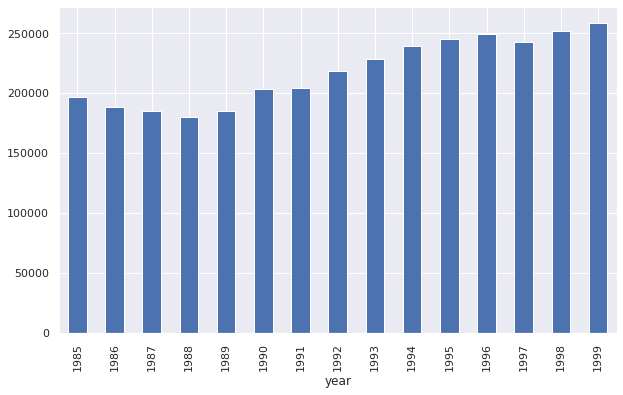

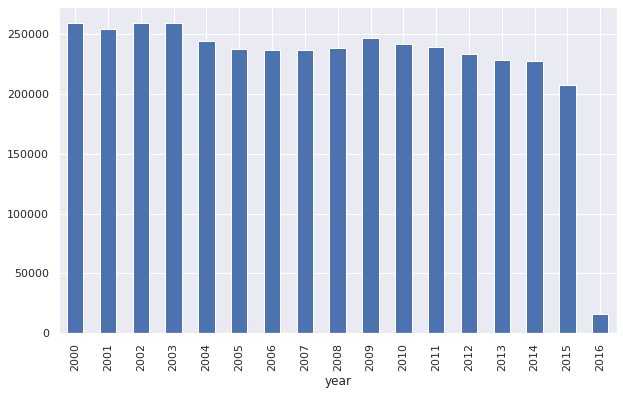

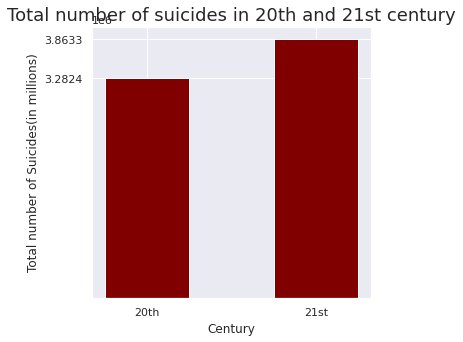

In [12]:
# 5. Calculate the total number of suicides in 20th and 21st century seperately and compare them. 

df['year'] = df['year'].astype(int)
df_21stcen = df.loc[df['year'] >= 2000]
df_20thcen = df.loc[df['year'] < 2000]
df_20thcen16years = df_20thcen.loc[df_20thcen['year']>1984]    #

df21 = df_21stcen.groupby("year")["suicides_no"].sum()
df20 = df_20thcen16years.groupby("year")["suicides_no"].sum()

df20.plot.bar(figsize=(10, 6))
plt.show()

df21.plot.bar(figsize=(10, 6))
plt.show()

total_df20=df20.sum()
total_df21=df21.sum()

x=["20th","21st"]
y=[total_df20,total_df21]

fig = plt.figure(figsize = (5, 5))
plt.title("Total number of suicides in 20th and 21st century",fontsize=18)
plt.xlabel("Century")
plt.ylabel("Total number of Suicides(in millions)")
plt.bar(x, y, color ='maroon',
        width = 0.5)
plt.yticks(y)
plt.show()







## Potential Data Science:
To begin with, the data set did not have many features but it was enough to act as a catalyst to bring about many thoughts, ideas and questions to our group. I would like to refer back to the place in our project where we raised an important question; what are the causes or reasons behind some of these suicides? The question is broad enough and does not possess any one correct answer. 
Upon brain storming, reading multiple suicide prevention articles and kaggle analysis reports we came up with a data science application as an extension of the selected data that can be a valuable resource and stand substantial even in real life settings. There might be numerous reasons for such a high number of suicide rate. It's a broad aspect which cannot be correctly answered without any substantial proof. However, the results that we achieved after detailed analysis of the data can guide us towards the correct direction for finding the actual cause for such high numbers. For instance some features that could be added to the data set that would add a lot of context to the data and help readers understand it easier of what we are trying to convey are: 

                - Gross Domestic Product (GDP) per contry
                - Standard of Living per country
                - Availability of Resources regarding mental health
                - Strict Laws relating to personal growth
                
As can be seen just a few more statistics to add context to data could lead a long way to be able to describe further ideas regarding data science. Knowing GDP of countries included here, would allow us to cross-reference easily between the two statistics and allow for further conclusion making and further hypothesis to form to help grasp the true nature of any conclusion we made previously before further analyzation could be completed. Standard of living can be another aspect that could greatly deepen our knowledge of aspects of the data as though countries may produce good at a good rate and be trading freely over the world the standard of living could really add depth and further layers of analysis that could be attempted to come to a true as can be conclusion. 

## Conclusion:
Overall, the exploratory data analysis alongside general analysis of the data did reveal quite a bit about the chosen data set and was able to answer some of the question that were proposed to be discussed in the proposal section of this assignment. Understanding that a few more context adding feature could really increase the limitations of the current version of the data set we can look come to conclusion of some rudimentary aspects relating the number of suicides per country and relating that to different genders numbers as well as the overall ratio between suicides and overall population of a country. It important to remember that when looking at the data context matters allot. For example, when looking at total amount of suicides per country Spain and Macau are rated beside each other in the statistics but with context added and comparing total populations of the individual countries and coming up with a ratio a clear conclusion can be drawn that Spain has a much less suicide rate compared Macau. On the other had it important to keep in mind of incorrect reporting and underreporting of suicide statistic by some countries and therefore if a country rank low in suicide rate vs country it does not immediately point to positive signs. Overall, the data was organised and represented in many different ways in the analytical report including suicide per age regardless of country and population. The data was also organised to show suicides differing by gender and further on. Overall, we believe the original object of report was met and we gain deeper knowledge of the original data set through the use of skills learned about data analysis. Skills such as data selection, cleaning, organising we a important tool to be able to complete the project with a sense of accomplishment while leaving with a clear idea of ways to improve upon given another iteration. 